In [2]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from Weekly_report import execute3, pivot
from simulation import *
from analysis import *
import pymssql
from statsmodels.tsa.vector_ar.vecm import *
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from tqdm.notebook import tqdm

In [3]:
def standardize(df):
    return (df-df.mean())/df.std()

In [4]:
qry = "SELECT * FROM DATABASE"
FUND_ADJ_PRICE = execute3(qry)
FUND_ADJ_PRICE = pivot(FUND_ADJ_PRICE, 'BASEDATE', 'FUND_CD', 'FUND_ADJ_PRICE')
# FUND_ADJ_PRICE=FUND_ADJ_PRICE.pct_change().dropna(how='all')
FUND_ADJ_PRICE=FUND_ADJ_PRICE.dropna(how='all')
FUND_ADJ_PRICE.index = pd.to_datetime(FUND_ADJ_PRICE.index)

In [5]:
Today = str(datetime.datetime.today().date())
qry = (f"""
       SELECT *
       FROM DATABASE
       WHERE BASEDATE <= '{Today}'
       ORDER BY BASEDATE
       """)
FUND_ADJ_PRICE = execute3(qry)
data = pivot(FUND_ADJ_PRICE, 'BASEDATE', 'FUND_CD', 'FUND_ADJ_PRICE')
match_fund_name = {}
data = data[match_fund_name.keys()]
data.index = pd.to_datetime(data.index)
FUND_ADJ_PRICE = data.pct_change().dropna(how='all')

In [ ]:
qry = "SELECT * FROM DATABASE WHERE BASEDATE >= '2003-01-01' ORDER BY BASEDATE"
INDEX = execute3(qry)
INDEX = pivot(INDEX, 'BASEDATE', 'TICKER', 'PX_LAST')
# INDEX=INDEX.pct_change().dropna(how='all').loc[FUND_ADJ_PRICE.index[0]:FUND_ADJ_PRICE.index[-1],:]
# INDEX=INDEX.dropna(how='all').loc[FUND_ADJ_PRICE.index[0]:FUND_ADJ_PRICE.index[-1],:]
INDEX=INDEX.dropna(how='all').loc[pd.to_datetime('2007-01-10'):,:]
INDEX.index = pd.to_datetime(INDEX.index)
INDEX = INDEX.dropna(thresh=0.9*INDEX.shape[1], axis=0)
INDEX = INDEX.dropna(thresh=0.9*INDEX.shape[0], axis=1)

In [19]:
temp = INDEX.resample('w-Fri').mean().ffill()
temp = temp.apply(standardize)

In [20]:
temp.dropna(inplace=True, axis=1)
temp.loc[pd.to_datetime('2007-01-01'):].isna().sum().sum()

0

In [ ]:
temp

TICKER,BCOM Index,BCOMAG Index,BCOMIN Index,BCS5TRUU Index,BXN Index,BXNT Index,CEMBTOBS Index,CESICNY Index,CESIEUR Index,CESIGBP Index,...,USGG10YR Index,USGG2YR Index,USGGBE10 Index,USSP10 CMPN Curncy,V2X Index,VIX Index,VKOSPI Index,VNKY Index,XAU Curncy,XCMP Index
BASEDATE,,,,,,,,,,,,,,,,,,,,,
2007-01-12,1.131072,-0.012502,1.691014,-0.889525,-0.863103,-0.841824,-1.225189,-0.298901,0.492864,0.360235,...,2.286693,2.845952,0.605985,1.762264,-0.866999,-1.037022,-0.212209,-0.758848,-2.185273,-0.873101
2007-01-19,1.157932,0.118724,1.640577,-0.880255,-0.865106,-0.843570,-1.237640,-0.382859,0.671165,0.677358,...,2.322198,2.878101,0.640704,1.792226,-0.875717,-1.068161,-0.334953,-0.811402,-2.147414,-0.874742
2007-01-26,1.280297,0.100687,1.847864,-0.880255,-0.885577,-0.861416,-1.261309,-0.627924,0.590017,1.025804,...,2.385654,2.922548,0.864481,1.800306,-0.868699,-1.054565,-0.314954,-0.831633,-2.102513,-0.882530
2007-02-02,1.309660,0.084548,1.654113,-0.876061,-0.874978,-0.852176,-1.240475,-0.935457,0.421341,0.897320,...,2.406911,2.929040,0.940862,1.916060,-0.904473,-1.057416,-0.283652,-0.891664,-2.085510,-0.878066
2007-02-09,1.353257,0.098344,1.516577,-0.873265,-0.858333,-0.837665,-1.230736,-0.870186,0.330164,0.693158,...,2.322975,2.881909,0.838431,1.823782,-1.029112,-1.060925,-0.321910,-0.972805,-2.066701,-0.874205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27,-0.153545,0.334238,0.848385,1.641053,1.430876,1.552560,0.120383,0.648657,1.248920,0.403756,...,0.974436,2.319042,0.677577,-0.694243,-0.598957,-0.133988,-0.351691,-0.751811,1.780109,1.557718
2023-02-03,-0.218291,0.449251,0.784324,1.681732,1.459802,1.580313,0.120383,0.899729,1.421244,0.074021,...,0.969206,2.317435,0.566047,-0.606709,-0.613917,-0.157233,-0.287348,-0.809204,1.724723,1.654917
2023-02-10,-0.269586,0.428573,0.581835,1.677755,1.480148,1.599865,0.120383,1.257716,1.386901,-0.338876,...,1.165749,2.545985,0.730109,-0.649335,-0.494731,-0.054386,-0.263871,-0.877151,1.582485,1.677339


In [22]:
temp.shape

(842, 229)

In [ ]:
chi_square_value,p_value=calculate_bartlett_sphericity(temp)
chi_square_value, p_value

In [ ]:
# 0.8이상이어야 귀무가설 기각 = 요인분석 진행할 수 있음
kmo_all,kmo_model=calculate_kmo(temp)
kmo_model

##### 요인분석 시작  : 요인 선택 기준은 proportion Var가 5% 이상
- varimax : n_factors=4 : 마지막팩터 기여도 6.6%, cum Var:0.8371
- promax  : n_factors=5 : 마지막팩터 기여도 5.1%, cum Var:0.8848  -  -   -   (promax 5 낙찰!)
    - promax가 n_factors=4일 때 6.92%, cum=0.8338
- oblimin  :   ==> 아주 별로임
- oblimax  : n_factors=4 : 마지막팩터 기여도 6.24%, cum Var:0.8371
- quartimin  :   ==> 아주 별로임
- quartimax  : n_factors=4 : 마지막팩터 기여도 6.29%, cum Var:0.8371
- equamax  : n_factors=4 : 마지막팩터 기여도 6.29%, cum Var:0.8371

In [10]:
# rotation과 factor 최적 조합 산출
def factor_analysis(df, n_factors=9, rotation='varimax'):
    button=True
    fa = FactorAnalyzer(n_factors=n_factors, rotation=rotation)
    fa.fit(df)
    eigen_values, vectors = fa.get_eigenvalues()
    
    sub_factors = (eigen_values>1).sum()
    print(sub_factors)
    while True:
        fa = FactorAnalyzer(n_factors=sub_factors, rotation=rotation)
        fa.fit(df)
        if fa.get_factor_variance()[2][-1]>0.7:
            for i in range(sub_factors):
                w = fa.get_factor_variance()[1][i]
                if w>=0.05:
                    pass
                else:
                    sub_factors = i
                    print('found', i)
                    break
        break
    while True:
        sub_factors+=1
        fa = FactorAnalyzer(n_factors=sub_factors, rotation=rotation)
        fa.fit(df)
        w = fa.get_factor_variance()[1][-1]
        if w>=0.05:
            print('one more...')
            continue
        else:
            sub_factors -= 1
            break
    print('At last,', sub_factors, rotation)
    fa = FactorAnalyzer(n_factors=sub_factors, rotation=rotation)
    fa.fit(df)
    return pd.DataFrame(fa.get_factor_variance(), index=['SS Loadings=factor variance', 'Proportion Var', 'Cumulative Var'])

In [ ]:
%%time
for rot in tqdm(['varimax', 'promax', 'oblimin', 'oblimax', 'quartimin', 'quartimax', 'equamax']):
    temp_fac = factor_analysis(df=temp, rotation = rot)
    print(temp_fac)

##### (n_factors=5, rotation='promax')로 결정

In [23]:
fa = FactorAnalyzer(n_factors=5, rotation='promax')
fa.fit(temp)

FactorAnalyzer(n_factors=5, rotation_kwargs={})

In [24]:
pd.DataFrame(fa.get_factor_variance(), index=['SS Loadings=factor variance', 'Proportion Var', 'Cumulative Var'],
            columns = ['주식시장요인', '원자재요인','변동성요인', '미국통화정책요인', '기타공통요인'])

,주식시장요인,원자재요인,변동성요인,미국통화정책요인,기타공통요인
SS Loadings=factor variance,103.852553,38.593130,28.761908,19.498913,8.360749
Proportion Var,0.453505,0.168529,0.125598,0.085148,0.036510
Cumulative Var,0.453505,0.622034,0.747631,0.832779,0.869289


In [25]:
loading = pd.DataFrame(fa.loadings_, index=temp.columns)
looking_loading = (loading * (np.abs(loading)>0.5)).dropna(axis=1)

In [26]:
looking_loading

,0,1,2,3,4
TICKER,,,,,
BCOM Index,-0.000000,0.000000,0.000000,0.633379,-0.0
BCOMAG Index,-0.000000,0.000000,0.000000,0.828109,-0.0
BCOMIN Index,0.000000,0.592506,-0.000000,0.606779,0.0
BCS5TRUU Index,1.039806,-0.000000,-0.000000,0.000000,0.0
BXN Index,0.975023,-0.000000,-0.000000,-0.000000,0.0
...,...,...,...,...,...
VIX Index,0.000000,0.000000,-0.914191,0.000000,0.0
VKOSPI Index,-0.000000,0.000000,-0.856474,0.000000,0.0
VNKY Index,-0.000000,0.000000,-0.667019,-0.000000,0.0


### 요인분석 결과 : 잠재요인 파악
- Factor0 : 주식마켓 팩터
- Factor1: 곡물 등 원자재, 에너지, 금리
- Factor2 : 변동성의 반대방향 팩터 -> (-) 붙이면 변동성 팩터
- Factor3 : 미국 통화정책, 달러가치와 관련된 팩터

In [27]:
cf = pd.DataFrame(fa.transform(temp), index=temp.index, columns= ['주식시장요인', '원자재요인','변동성요인', '미국통화정책요인', '기타공통요인']) # 팩터 스코어 (# of time stamp x # of factors)
cf['변동성요인']*=-1

In [28]:
cf.corr()

,주식시장요인,원자재요인,변동성요인,미국통화정책요인,기타공통요인
주식시장요인,1.000000,-0.155170,-0.198039,-0.160211,-0.038365
원자재요인,-0.155170,1.000000,-0.454963,-0.130131,0.291122
변동성요인,-0.198039,-0.454963,1.000000,0.071492,-0.184399
미국통화정책요인,-0.160211,-0.130131,0.071492,1.000000,0.143814
기타공통요인,-0.038365,0.291122,-0.184399,0.143814,1.000000


In [29]:
stock_Fund = np.log((data['FUND_ID'].dropna().resample('W-Fri').mean()))
sensitivity_df = pd.concat([stock_Fund, cf],axis=1).dropna(how='all')

In [ ]:
sensitivity_df.corr()

In [121]:
from statsmodels.formula.api import ols
model = ols(formula = 'FUND_ID ~ 주식시장요인+원자재요인+변동성요인+미국통화정책요인+기타공통요인',data = sensitivity_df).fit()
results_as_html = model.summary().tables[1].as_html()
params = pd.read_html(results_as_html, header=0, index_col=0)[0]
model_basic= pd.DataFrame([model.rsquared, model.f_pvalue, model.df_resid],['R-squared', 'F-test prob', 'Df Residuals'] )
regress = pd.concat([model_basic.reset_index().T, params.T.reset_index().T]).replace(np.nan, '').applymap(lambda x: np.round(x,3) if type(x)==float else x)
regress.index = ['model', '', '', 'intercept', '주식시장요인', '원자재요인', '변동성요인', '미국통화정책요인', '기타공통요인']
regress

,0,1,2,3,4,5
model,R-squared,F-test prob,Df Residuals,,,
,0.387,0.0,290.0,,,
,coef,std err,t,P>|t|,[0.025,0.975]
intercept,7.04,0.008,891.696,0.0,7.024,7.055
주식시장요인,0.046,0.005,9.812,0.0,0.036,0.055
원자재요인,0.031,0.004,7.365,0.0,0.023,0.04
변동성요인,0.014,0.003,5.593,0.0,0.009,0.02
미국통화정책요인,-0.017,0.002,-7.634,0.0,-0.022,-0.013
기타공통요인,0.001,0.002,0.593,0.554,-0.003,0.006


In [ ]:
sensitivity_df.corr().applymap(lambda x: np.round(x,3) if type(x)==float else x)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(sensitivity_df.iloc[:,1:].values, i) for i in range(sensitivity_df.iloc[:,1:].shape[1])]
vif['features'] = sensitivity_df.iloc[:,1:].columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
vif  #다중공선성 없음!

### 1년 롤링 std가 높은 기간 picking 하는 기능

In [ ]:
qry = "SELECT * FROM DATABASE ORDER BY BASEDATE"
FUND_ADJ_PRICE = execute3(qry)

match_fund_name = {}

data = pivot(FUND_ADJ_PRICE, 'BASEDATE', 'FUND_CD', 'FUND_ADJ_PRICE')[match_fund_name.keys()]
data.index = pd.to_datetime(data.index)
rt = data.pct_change().dropna(how='all')

In [ ]:
return_data = rt['FUND_ID']
time_set, to_show_warning =picking_high_std2(return_data, 260, 0.8)
time_set

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(to_show_warning, bw_adjust=0.0225, fill=True, color='r')
plt.xlim(x_start)  # x축을 port_ind_std.index[0] 부터 시작되게 해야함
# if sorted(to_show_warning)[-1] > (datetime.datetime.now() - relativedelta(weeks=2)):
if to_show_warning[-1] > (x.index[-1] - relativedelta(weeks=2)):
    print('최근 변동폭이 크니 주의요망')

In [ ]:
fig = make_subplots()
trace = go.Histogram(x=to_show_warning, marker=dict(color='rgb(240,128,128)'))
fig.add_trace(trace)
fig.update_layout(legend=dict(x=1,
                    y=1,
                    traceorder='normal',
                    font=dict(family='sans-serif',
                            size=12,
                            color='black')),
            margin=dict(l=0,r=0,t=30,b=0),
            title=dict(text='{}일 rolling 변동성'.format(260),
                    pad_b=True, font=dict(family='Arial', size=25),
                    x=0.5),
            xaxis_range=[start,end], xaxis=dict(tickangle=90))

In [ ]:
def table(df):
    cum_return = ((1+df).prod()-1)*100   #단위가 %,  cum_return값이 42면 n년 동안 142%가 되었다. 1.42배 됐다
    #     num_of_days = (all_in_one.index[-1] - all_in_one.index[0]).days    #이건 business day가 아님
    num_of_day = df.notna().sum(0)
    annu_return = (((1+df).prod()**(262/num_of_day))-1)*100  #이미 단위가 %이므로  ann_return값이 1.41이면 매년 1.4%씩 성장
    # num_of_months = df.shape[0]
    # annu_return = (((1+df).prod()**(12/num_of_months))-1)*100 
    word = 'day'
    n = 252
    significance_level=5

    SD = np.std(df) * np.sqrt(n) * 100
    dSD = np.std((df<0)*df) * np.sqrt(n) * 100
    MDD=df.apply(cummdd).iloc[-1,:]*100
    record = pd.DataFrame({
        'cum_return(%)': cum_return,
        'annu_return(%)': annu_return,
        'SD(%)':SD,
        'MDD(%)': MDD,
        'R/SD':np.divide(annu_return, SD.tolist()),
        'R/MDD': -np.divide(annu_return, MDD),
        'Sortino' : np.divide(annu_return, dSD.tolist()),
        'MDD lasting time ({})'.format(word): df.apply(mdd_period).iloc[0],
        'MDD restoring time ({})'.format(word): df.apply(mdd_period).iloc[1],
        '{}% VaR'.format(significance_level): df.apply(var, alpha=significance_level).iloc[0],
        '{}% CVaR'.format(significance_level):df.apply(var, alpha=significance_level).iloc[1]
    })

    # cum_return_display = (1+df).cumprod()
    # print(cum_return_display)
    return pd.DataFrame(record.T)

In [ ]:
summary = pd.DataFrame()
for_table = pd.DataFrame()
for i in range(len(time_set)):
    des = (((1+return_data).resample('M').prod()-1).dropna()).loc[time_set[i][0]:time_set[i][1]].describe()
    des.name = str(time_set[i][0])+' - '+str(time_set[i][1])
    summary = pd.concat([summary, des], axis=1)
    temp_table = (return_data.dropna()).loc[time_set[i][0]:time_set[i][1]]
    temp_table.name = str(time_set[i][0])+' - '+str(time_set[i][1])
    for_table = pd.concat([for_table, temp_table], axis=1)
display(table(for_table))
display(summary.T.iloc[:,1:]*1200)

### 자산별 포트폴리오 성과 기여도 분해
- 티커 뽑고 이용해서 가격데이터 받기     

In [30]:
qry = "SELECT * FROM DATABASE"
asset_raw = execute3(qry)

In [31]:
asset_raw.shape

(187, 21)

In [32]:
CTGR = asset_raw.groupby(by=['MASKING']).get_group(('BM'))
CTGR['TICKER'].values   #자산군 L-M-S분류별 BM만 뽑음

array(['SPTR Index', 'M2WOU Index', 'M2EF Index', 'SPGSCITR Index',
       'XAU Curncy', 'ACWI US Equity', '251350 KS Equity',
       '195980 KS Equity', '153130 KS Equity', '114820 KS Equity',
       '114260 KS Equity', '114100 KS Equity', 'IEFA US Equity',
       'BOND US Equity', 'BND US Equity', 'VXUS US Equity',
       'VWO US Equity', 'VT US Equity', 'VEA US Equity', 'JNK US Equity',
       'IWM US Equity', 'IEMG US Equity', 'SCHD US Equity',
       'RSP US Equity', 'QQQ US Equity', 'IAU US Equity', 'HYS US Equity',
       'HYG US Equity', 'SPY US Equity', 'SPY US Equity', 'SPY US Equity',
       'ESGU US Equity', 'EMXC US Equity', 'EMB US Equity',
       'EFA US Equity', 'EEM US Equity', 'URTH US Equity',
       'TOTL US Equity', 'AGG US Equity', 'ACWI US Equity',
       '385550 KS Equity', '385540 KS Equity', 'ACWI US Equity',
       'ACWI US Equity', 'KBPMMMCA Index', 'LBUSTRUU Index',
       'KBPMABIN Index', 'IBOXHY Index', 'EMUSTRUU Index', 'M2WD Index',
       'URTH US Equ

In [33]:
index_ticker = CTGR.groupby('SECTOR').get_group('INDEX')['TICKER'].values.tolist()  ##BM 중에서도 Index만 뽑음
# index_ticker = index_ticker+['SPX Index']

In [34]:
index_ticker

['SPTR Index',
 'M2WOU Index',
 'M2EF Index',
 'SPGSCITR Index',
 'XAU Curncy',
 'KBPMMMCA Index',
 'LBUSTRUU Index',
 'KBPMABIN Index',
 'IBOXHY Index',
 'EMUSTRUU Index',
 'M2WD Index']

In [35]:
qry = "SELECT * FROM DATABASE"
index_BB = execute3(qry)
index_BB = pivot(index_BB, 'BASEDATE', 'TICKER', 'PX_LAST')
index_BB.index = pd.to_datetime(index_BB.index)

In [36]:
qry = "SELECT * FROM DATABASE"
FUND_ADJ_PRICE = execute3(qry)
FUND_ADJ_PRICE = pivot(FUND_ADJ_PRICE, 'BASEDATE', 'FUND_CD', 'FUND_ADJ_PRICE')
# FUND_ADJ_PRICE=FUND_ADJ_PRICE.pct_change().dropna(how='all')
FUND_ADJ_PRICE=FUND_ADJ_PRICE.dropna(how='all')
FUND_ADJ_PRICE.index = pd.to_datetime(FUND_ADJ_PRICE.index)

In [37]:
# # 12개의 대표 자산 일별 수익률 + portfolio index (지금은 random한 index의 선형합이라는 가상의 포트폴리오 설정)
# asset = pd.concat([x['portfolio index'], index_BB[index_ticker]],axis=1).dropna()   
# asset_log = asset.applymap(np.log)  #"ci"
# # asset_log = asset.apply(standardize)     #"colo"
# # asset_log = np.log(asset).diff().dropna() # "n"

In [159]:
FUND_ADJ_PRICE['FUND_ID'].name = 'portfolio_index'
asset = pd.concat([FUND_ADJ_PRICE['FUND_ID'], index_BB[index_ticker]],axis=1).dropna()   
# asset_log = asset.applymap(np.log)  #"ci"
# asset_log = asset.apply(standardize)     #"colo"
asset_log = np.log(asset).diff().dropna() # "n"

In [160]:
import warnings
warnings.filterwarnings(action='ignore')
for i in ['n', 'co', 'ci', 'lo', 'li', 'cili', 'colo']:
    lag_order = select_order(data=asset_log, maxlags=15, deterministic=i)
    print('기준', i,lag_order.selected_orders)   #  lag = 1,2으로 해보자

기준 n {'aic': 6, 'bic': 0, 'hqic': 4, 'fpe': 6}
기준 co {'aic': 6, 'bic': 0, 'hqic': 4, 'fpe': 6}
기준 ci {'aic': 6, 'bic': 0, 'hqic': 4, 'fpe': 6}
기준 lo {'aic': 6, 'bic': 0, 'hqic': 4, 'fpe': 6}
기준 li {'aic': 6, 'bic': 0, 'hqic': 4, 'fpe': 6}
기준 cili {'aic': 6, 'bic': 0, 'hqic': 4, 'fpe': 6}
기준 colo {'aic': 6, 'bic': 0, 'hqic': 4, 'fpe': 6}


In [161]:
rank_test = select_coint_rank(asset_log, 0, lag_order.hqic, method="trace",
                              signif=0.05)
rank_test.rank

12

In [162]:
model = VECM(asset_log, deterministic="n", k_ar_diff=lag_order.hqic, coint_rank=rank_test.rank)
vecm_res = model.fit()

### 충격반응분석 : VECM(orth=False)쓰던가,  1차 차분해서 VAR(generalized)쓰던가

In [163]:
## asset_log 데이터를 diff로 주면 0으로 수렴하고(변화율이니까), log나 표준화로 주면 수렴 안 함(level이니까)
num_periods = 24
ir = vecm_res.irf(periods=num_periods)
# ir.plot(orth=False, response=0, plot_stderr=False)  # 첫 행이 portfolo가 영향을 받는 결과 / 첫 열이 portfolio가 영향을 주는 결과

In [164]:
import plotly.graph_objects as go

In [165]:
np.where(asset_log.columns=='KBPMMMCA Index')

(array([6], dtype=int64),)

In [166]:
fig = make_subplots()
fig.add_trace(go.Scatter(y=ir.cum_effects[:, 0, 1], x=[x for x in range(0, 25)], mode='lines'))
fig.add_trace(go.Scatter(y=[0]*25, x=[x for x in range(0, 25)], mode='lines'))

In [187]:
shock = np.diag((ir.orth_irfs/vecm_res.ma_rep(24))[0,:,:])*100   ## 상승충격 

In [188]:
shock

array([0.34260617, 1.19586391, 0.63984746, 0.710054  , 1.32342333,
       0.80680509, 0.00358482, 0.24997314, 0.15950366, 0.23043293,
       0.14436365, 0.04358218])

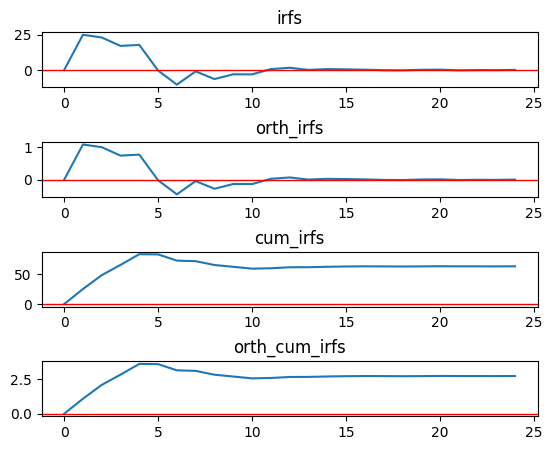

In [186]:
import matplotlib.pyplot as plt
n = 11 # 어떤 자산이 portfolio에 1std만큼 양의 충격을 t=0기에 주었는가에 해당
plt.subplot(4, 1, 1)     # constant하게1% 충격을 줬을 때
plt.plot(ir.irfs[:,0, n]/shock[n])
plt.axhline(y=0, color='r', linewidth=1)
plt.title('irfs')

plt.subplot(4, 1, 2)
plt.plot(100*ir.orth_irfs[:,0, n]/shock[n])
plt.axhline(y=0, color='r', linewidth=1)
plt.title('orth_irfs')

plt.subplot(4, 1, 3)
plt.plot(ir.cum_effects[:,0, n]/shock[n])
plt.axhline(y=0, color='r', linewidth=1)
plt.title('cum_irfs')

plt.subplot(4, 1, 4)
plt.plot(100*ir.orth_cum_effects[:,0, n]/shock[n])
plt.axhline(y=0, color='r', linewidth=1)
plt.title('orth_cum_irfs')

plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=1)

In [25]:
pd.DataFrame(ir.cum_effects[[0,1,12,18,24],0, :], index=[0,1,12,18,24], columns = asset_log.columns)

,portfolio_index,SPTR Index,M2WOU Index,M2EF Index,SPGSCITR Index,XAU Curncy,KBPMMMCA Index,LBUSTRUU Index,KBPMABIN Index,IBOXHY Index,EMUSTRUU Index,M2WD Index
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.664478,-0.088039,-0.119982,-0.029831,0.012842,0.027061,1.506049,-0.031485,-0.081053,0.112345,-0.022511,1.090269
12,0.798935,-1.229522,-0.168811,-0.384835,0.029210,-0.006511,6.578812,-0.105317,-0.102252,-0.057661,0.423146,2.700342
18,0.788253,-1.244399,-0.188524,-0.390493,0.034182,-0.008670,6.930082,-0.117366,-0.122466,-0.080539,0.463022,2.754184
24,0.786608,-1.254925,-0.189059,-0.393010,0.033742,-0.007007,7.883535,-0.114709,-0.109065,-0.077234,0.460061,2.769984


## VECM에서 분산분해되도록 함수 만들기

In [ ]:
def mse(model, steps):
        r"""
        model = vecm_res
        """
        ma_coefs = model.ma_rep(steps)

        k = len(model.sigma_u)
        forc_covs = np.zeros((steps, k, k))

        prior = np.zeros((k, k))
        for h in range(steps):
            # Sigma(h) = Sigma(h-1) + Phi Sig_u Phi'
            phi = ma_coefs[h]
            var = phi @ model.sigma_u @ phi.T
            forc_covs[h] = prior = prior + var

        return forc_covs

In [ ]:
def fevd(model, P=None, periods=None):  #model = vecm_res
        from statsmodels.tsa.vector_ar import output
        from statsmodels.tsa.vector_ar.output import VARSummary
        from statsmodels.compat.python import lrange
        from io import StringIO
        
        self_model = model
        self_neqs = model.neqs
        self_names = model.model.endog_names

        temp_irf = model.irf(periods=periods)
        self_orth_irfs = temp_irf.orth_irfs

        # cumulative impulse responses
        irfs = (self_orth_irfs[:periods] ** 2).cumsum(axis=0)

        rng = lrange(self_neqs)
        self_mse = mse(self_model, periods)[:, rng, rng]

        # lag x equation x component
        fevd = np.empty_like(irfs)

        for i in range(periods):
            fevd[i] = (irfs[i].T / self_mse[i]).T

        # switch to equation x lag x component
        self_decomp = fevd.swapaxes(0, 1)
        
        buf = StringIO()
        rng = lrange(periods)
        for i in range(self_neqs):
            ppm = output.pprint_matrix(self_decomp[i], rng, self_names)
            buf.write("FEVD for %s\n" % self_names[i])
            buf.write(ppm + "\n")
            
            globals()['fevd_{}'.format(self_names[i][:-6])] = pd.DataFrame(self_decomp[i], index=rng, columns=self_names)

In [ ]:
fevd(vecm_res, periods=24)
graph = fevd_portfolio.iloc[-1,1:]/np.sum(fevd_portfolio.iloc[-1,1:])*100

In [ ]:
fevd(vecm_res, periods=24)

In [ ]:
plt.rcdefaults()

In [ ]:
graph

In [ ]:
fig = make_subplots()
fig.add_trace(go.Bar(y = graph, x=[x[:-6] for x in graph.index]))

In [ ]:
fevd_summary = fevd_portfolio.iloc[[2,6,12,18,23],:]
fevd_summary.index = [2,6,12,18,24]
fevd_summary*100
# 특정 펀드에 가장 영향을 많이 미치는 애들 : SPTR Index(=S&P500) XAU Curncy LBUSTRUU Index EMUSTRUU Index : dollar unhedged상품이 많고 금도 있음
### -> 사실상 달러에 가장 영향 많이 받는다고 해석하도 무방
# 특정 펀드에 가장 영향을 많이 미치는 애들 : SPTR Index(=S&P500)  M2WOU Index(=MSCI WORLD ex USA)
### -> DM의 주식시장이 압도적으로 많이 영향 끼침

In [ ]:
fevd_summary.index[0]

In [ ]:
np.where(asset_log.columns=='SPTR Index')[0][0]